In [1]:
import cobra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
def conditions(uptake,name,source):
    o2_uptake=np.linspace(-20,-0.25,20)
    model=cobra.io.read_sbml_model('/Users/amit/Desktop/Mac/ScientificReports/Lachancea-kluyveri-iPN730-master/iPN730.xml')
    model.solver='glpk'
    model.reactions.EX_cpd00092_e0.bounds=(0,1000)
    model.reactions.EX_cpd19013_e0.bounds=(-1000,1000)
    model.reactions.get_by_id(source).bounds=(uptake,1000)
    df=pd.DataFrame(columns=['Condition','Uptake rate','Oxygen uptake rate','Ethanol','Growth rate','Ethyl acetate','Acetate'])
    for our in o2_uptake:
        model.reactions.EX_cpd00007_e0.bounds=(our,1000)
        #Uptake rate	Oxygen uptake rate	Ethanol	Growth rate	Ethyl acetate
        model.slim_optimize()
        cond=name+"_"+str(abs(round(our,2)))
        etoh=model.reactions.rxn00543_c0.flux
        gr=model.slim_optimize()
        etac=model.reactions.EtAc_t.flux
        ac=model.reactions.rxn00507_c0.flux
        df_temp=pd.DataFrame([[cond,abs(uptake),abs(our),abs(etoh),gr,etac,ac]],columns=['Condition','Uptake rate','Oxygen uptake rate','Ethanol','Growth rate','Ethyl acetate','Acetate'])
        df=df.append(df_temp,ignore_index=True)
    return df
        

In [5]:
df_main=pd.DataFrame(columns=['Condition','Uptake rate','Oxygen uptake rate','Ethanol','Growth rate','Ethyl acetate','Acetate'])
carb_sources=['EX_cpd00027_e0','EX_cpd00108_e0','EX_cpd00179_e0','EX_cpd00076_e0']
carb_names=['Glucose','Galactose','Maltose','Sucrose']
uptake_rates=[-2.26,-2.36,-2.2,-1.2]
for name,source,uptake in zip(carb_names,carb_sources,uptake_rates):
    df=conditions(uptake,name,source)
    df_main=df_main.append(df,ignore_index=True)

In [6]:
df_main["Carbon Source"]=df_main['Condition'].apply(lambda x:x[0:x.index('_')])
df_main

,Condition,Uptake rate,Oxygen uptake rate,Ethanol,Growth rate,Ethyl acetate,Acetate,Carbon Source
0,Glucose_20.0,2.26,20.000000,0.000000,0.220291,0.000000,0.173941,Glucose
1,Glucose_18.96,2.26,18.960526,0.000000,0.220291,0.000000,0.173941,Glucose
2,Glucose_17.92,2.26,17.921053,0.000000,0.220291,0.000000,0.173941,Glucose
3,Glucose_16.88,2.26,16.881579,0.000000,0.220291,0.000000,0.173941,Glucose
4,Glucose_15.84,2.26,15.842105,0.000000,0.220291,0.000000,0.173941,Glucose
...,...,...,...,...,...,...,...,...
75,Sucrose_4.41,1.20,4.407895,3.918924,0.244215,1.515111,1.707943,Sucrose
76,Sucrose_3.37,1.20,3.368421,4.771869,0.213074,1.321914,1.490158,Sucrose
77,Sucrose_2.33,1.20,2.328947,5.624814,0.181934,1.128718,1.272372,Sucrose
78,Sucrose_1.29,1.20,1.289474,6.477759,0.150793,0.935521,1.054587,Sucrose


In [15]:
df_main.to_csv("/Users/amit/Desktop/Mac/ScientificReports/Lachancea-kluyveri-iPN730-master/CarbEthEtAC.csv")

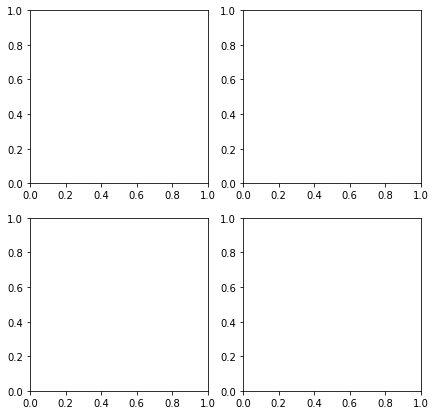

In [16]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(7,7))

In [17]:
df_glucose=df_main[df_main['Carbon Source']=='Glucose'][12:19]
ax1.plot(df_glucose['Oxygen uptake rate'],df_glucose['Ethyl acetate'],'ro-')
ax1.plot(df_glucose['Oxygen uptake rate'],df_glucose['Ethanol'],'bo-')
ax1.plot(df_glucose['Oxygen uptake rate'],df_glucose['Acetate'],'go-')
ax1.plot(df_glucose['Oxygen uptake rate'],df_glucose['Growth rate'],'ko-')
ax1.set_title('Glucose')

Text(0.5, 1, 'Glucose')

In [18]:
df_galactose=df_main[df_main['Carbon Source']=='Galactose'][12:19]
ax2.plot(df_galactose['Oxygen uptake rate'],df_galactose['Ethyl acetate'],'ro-')
ax2.plot(df_galactose['Oxygen uptake rate'],df_galactose['Ethanol'],'bo-')
ax2.plot(df_galactose['Oxygen uptake rate'],df_galactose['Acetate'],'go-')
ax2.plot(df_galactose['Oxygen uptake rate'],df_galactose['Growth rate'],'ko-')
ax2.set_title('Galactose')
ax2.legend(['Ethyl Acetate','Ethanol','Acetate','Growth rate'])

In [19]:
df_maltose=df_main[df_main['Carbon Source']=='Maltose'][7:19]
ax3.plot(df_maltose['Oxygen uptake rate'],df_maltose['Ethyl acetate'],'ro-')
ax3.plot(df_maltose['Oxygen uptake rate'],df_maltose['Ethanol'],'bo-')
ax3.plot(df_maltose['Oxygen uptake rate'],df_maltose['Acetate'],'go-')
ax3.plot(df_maltose['Oxygen uptake rate'],df_maltose['Growth rate'],'ko-')
ax3.set_title('Maltose')

Text(0.5, 1, 'Maltose')

In [20]:
df_sucrose=df_main[df_main['Carbon Source']=='Sucrose'][12:19]
ax4.plot(df_sucrose['Oxygen uptake rate'],df_sucrose['Ethyl acetate'],'ro-')
ax4.plot(df_sucrose['Oxygen uptake rate'],df_sucrose['Ethanol'],'bo-')
ax4.plot(df_sucrose['Oxygen uptake rate'],df_sucrose['Acetate'],'go-')
ax4.plot(df_sucrose['Oxygen uptake rate'],df_sucrose['Growth rate'],'ko-')
ax4.set_title('Sucrose')

Text(0.5, 1, 'Sucrose')

In [22]:
fig.savefig('/Users/amit/Desktop/Mac/ScientificReports/Lachancea-kluyveri-iPN730-master/CarbEtac.png',dpi=600)

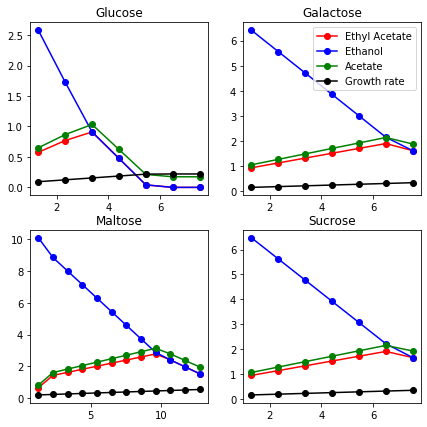

In [23]:
fig